## Simulation with Bayesian Information Criterion:

### Estimating the number of componenets of NMF:
 


<img src="BIC.png" alt="NMF on documents" style="width: 80%"/>

In [1]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import isspmatrix
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import NMF

# ==============================
# Simulation

# Assumptions
n = 10
k = 2  # Number of components (to be estimated)
M = 100  # Total number of data
np.random.seed(12345)

# Parameters to be estimated
# A_norm: n by k
# B_norm: k by n
# r_prob: k probabilities with sum 1

A_norm = np.zeros((n,k))
A_norm[0,0] = 1.0
A_norm[1,1] = 0.5
A_norm[2,1] = 0.5

B_norm = np.zeros((k,n))
B_norm[0,1] = 0.5
B_norm[0,2] = 0.5
B_norm[1,3] = 1.0

r_prob = np.array([0.6,0.4])

# Construct unnormalized A, B
A = np.dot(A_norm, np.diag(np.sqrt(M * r_prob)))
B = np.dot(np.diag(np.sqrt(M * r_prob)), B_norm)

# Construct the matrix of average frequencies
# N.B. A, B are dense, but X should be sparse.

tmp = [(i,j,np.dot(A[i,:],B[:,j])) for i in np.nonzero(A)[0] for j in np.nonzero(B)[1]]
row_idx = [x[0] for x in tmp if x != 0.0]
col_idx = [x[1] for x in tmp if x != 0.0]
dat = [x[2] for x in tmp if x != 0.0]

X_avg = csr_matrix((dat, (row_idx, col_idx)), shape=(n,n))
X_avg.toarray()
isspmatrix(X_avg)

# For debug, compare them:
# X_avg.toarray()
# np.dot(A,B)

noise = 1.0
X_avg = np.dot(A,B) + noise
X = np.zeros((n,n))
for i in range(n):
  for j in range(n):
    X[i,j] = np.random.poisson(X_avg[i,j],1)

X

array([[ 1., 25., 32.,  3.,  2.,  0.,  0.,  4.,  2.,  0.],
       [ 1.,  3.,  0., 21.,  0.,  3.,  1.,  0.,  0.,  1.],
       [ 1.,  1.,  3., 21.,  2.,  0.,  1.,  0.,  2.,  3.],
       [ 0.,  1.,  0.,  0.,  2.,  2.,  1.,  1.,  0.,  1.],
       [ 4.,  1.,  2.,  0.,  0.,  1.,  0.,  1.,  2.,  1.],
       [ 2.,  2.,  1.,  2.,  1.,  2.,  0.,  1.,  0.,  2.],
       [ 1.,  2.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  3.,  1.,  0.,  1.,  2.,  1.,  2.,  3.],
       [ 3.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  2.,  0.],
       [ 1.,  0.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.]])

In [2]:
# ==============================
# Model of NMF

n_components = 2

# m = NMF(n_components = n_components,
#         init = 'random', random_state = 123,
#         alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)

m = NMF(n_components = n_components, beta_loss = 'kullback-leibler', solver = 'mu',
        init = 'random', random_state = 123,
        alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)

m.get_params()
print("#iterations= %d" % m.n_iter_)
print("reconstruction error= %e" % m.reconstruction_err_)

W = m.fit_transform(X)
H = m.components_

# Look at the result more closely
np.dot(W, H)

Epoch 10 reached after 0.003 seconds, error: 11.629554
Epoch 20 reached after 0.005 seconds, error: 11.087011
Epoch 30 reached after 0.007 seconds, error: 11.032601
Epoch 40 reached after 0.009 seconds, error: 11.013441
Epoch 50 reached after 0.010 seconds, error: 11.008312
Epoch 60 reached after 0.012 seconds, error: 11.008022
#iterations= 60
reconstruction error= 1.100802e+01
Epoch 10 reached after 0.002 seconds, error: 11.629554
Epoch 20 reached after 0.004 seconds, error: 11.087011
Epoch 30 reached after 0.006 seconds, error: 11.032601
Epoch 40 reached after 0.008 seconds, error: 11.013441
Epoch 50 reached after 0.009 seconds, error: 11.008312
Epoch 60 reached after 0.010 seconds, error: 11.008022


array([[1.15447824e+00, 2.30761876e+01, 3.28271982e+01, 2.67279924e+00,
        1.97461621e+00, 4.34002926e-07, 3.15638492e-07, 4.99515715e+00,
        2.29415003e+00, 5.12912549e-07],
       [3.19138067e+00, 1.39544516e+00, 2.05771706e-07, 1.23803609e+01,
        1.39491439e+00, 2.80327263e+00, 2.03874373e+00, 9.19744055e-01,
        2.56494434e+00, 3.31295857e+00],
       [3.25601523e+00, 2.74055549e+00, 1.91518821e+00, 1.25257464e+01,
        1.50892783e+00, 2.80088394e+00, 2.03700650e+00, 1.21038529e+00,
        2.69660286e+00, 3.31013557e+00],
       [7.84725740e-01, 5.85084305e-01, 3.51899287e-01, 3.02483834e+00,
        3.58752360e-01, 6.78423519e-01, 4.93398923e-01, 2.76135226e-01,
        6.45338093e-01, 8.01773250e-01],
       [9.26066885e-01, 1.68383535e+00, 1.86000914e+00, 3.49018554e+00,
        4.88064304e-01, 7.55988261e-01, 5.49809644e-01, 5.31065777e-01,
        8.21703661e-01, 8.93440672e-01],
       [1.10138484e+00, 1.50893944e+00, 1.49415533e+00, 4.19042369e+00,
   

In [3]:
# Normalize W, H

W_norm = W / np.sum(W,axis=0,keepdims=True)
np.sum(W_norm, axis=0)

H_norm = H / np.sum(H,axis=1,keepdims=True)
np.sum(H_norm, axis=1)

W_sum = np.sum(W,axis=0,keepdims=True).ravel()
H_sum = np.sum(H,axis=1,keepdims=True).ravel()

# "Probability" of each component
W_sum * H_sum / np.dot(W_sum, H_sum)

print(np.dot(W_sum, H_sum))
# This should be equal to
print(np.sum(X))

206.0
206.0


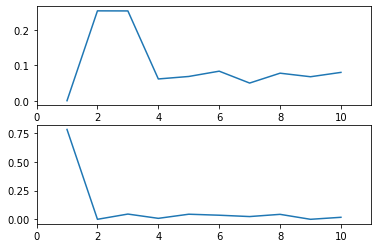

In [4]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.plot(np.arange(n)+1, W_norm[:,i])
  plt.xlim([0,W_norm.shape[0]+1])

# plt.show(block=False)

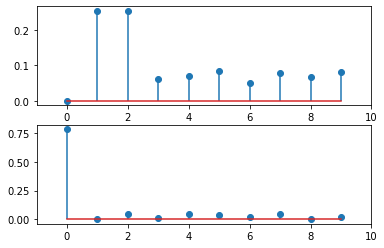

In [5]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.stem(W_norm[:,i], use_line_collection=True)
  plt.xlim([-1,W_norm.shape[0]])

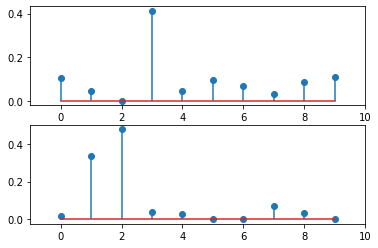

In [6]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.stem(H_norm[i,:], use_line_collection=True)
  plt.xlim([-1,H_norm.shape[1]])

In [7]:
# ----------
# BIC (Bayesian Information Criterion)

ks = np.array(range(1,6))  # #components
bic1 = np.zeros(len(ks))  # BIC 1st term: minus of log likelihood
bic2 = np.zeros(len(ks))  # BIC 2nd term: penalty or Occam's factor

for i in range(len(ks)):
  n_components = ks[i]
  m = NMF(n_components = n_components, beta_loss = 'kullback-leibler', solver = 'mu',
          init = 'random', random_state = 123,
          alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)
  bic1[i] = 0.5 * (m.reconstruction_err_ ** 2)
  bic2[i] = 2 * n * n_components * np.log(n)

bic = bic1 + bic2



Epoch 10 reached after 0.001 seconds, error: 15.525125
Epoch 20 reached after 0.003 seconds, error: 15.525125
Epoch 10 reached after 0.001 seconds, error: 11.629554
Epoch 20 reached after 0.002 seconds, error: 11.087011
Epoch 30 reached after 0.003 seconds, error: 11.032601
Epoch 40 reached after 0.004 seconds, error: 11.013441
Epoch 50 reached after 0.005 seconds, error: 11.008312
Epoch 60 reached after 0.006 seconds, error: 11.008022
Epoch 10 reached after 0.002 seconds, error: 8.568175
Epoch 20 reached after 0.003 seconds, error: 7.920283
Epoch 30 reached after 0.004 seconds, error: 7.894637
Epoch 40 reached after 0.005 seconds, error: 7.892336
Epoch 50 reached after 0.006 seconds, error: 7.892103
Epoch 10 reached after 0.001 seconds, error: 7.428354
Epoch 20 reached after 0.002 seconds, error: 7.179419
Epoch 30 reached after 0.002 seconds, error: 7.123633
Epoch 40 reached after 0.003 seconds, error: 7.089809
Epoch 50 reached after 0.004 seconds, error: 7.057311
Epoch 60 reached aft

Text(0, 0.5, 'BIC 1st term')

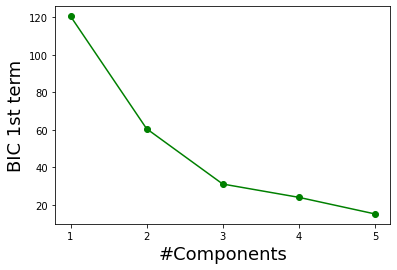

In [8]:
# plotting each BIC terms from the equation bic = bic1 + bic2

plt.figure()
plt.plot(ks, bic1, color="green", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC 1st term", fontsize=18)

# plt.show()

Text(0, 0.5, 'BIC 2nd term')

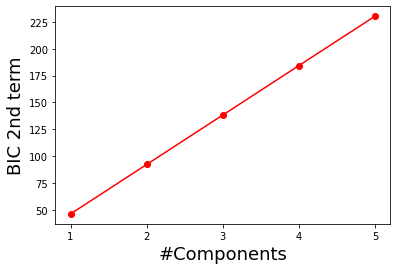

In [9]:
plt.figure()
plt.plot(ks, bic2, color="red", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC 2nd term", fontsize=18)

# plt.show()

Text(0, 0.5, 'BIC')

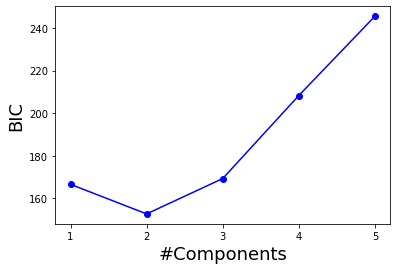

In [10]:
plt.figure()
plt.plot(ks, bic, color="blue", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC", fontsize=18)

# plt.show()